In [ ]:
# importing necessary packages
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

# 1. Comparison of Interpolation Methods for Image Resizing

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1UPYyDveYM8pDx1pN2mrv-Jw7-np8oe7r -O face.png

--2024-10-02 17:36:42--  https://drive.google.com/uc?id=1UPYyDveYM8pDx1pN2mrv-Jw7-np8oe7r
Resolving drive.google.com (drive.google.com)... 142.251.163.102, 142.251.163.100, 142.251.163.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UPYyDveYM8pDx1pN2mrv-Jw7-np8oe7r [following]
--2024-10-02 17:36:42--  https://drive.usercontent.google.com/download?id=1UPYyDveYM8pDx1pN2mrv-Jw7-np8oe7r
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9152 (8.9K) [image/png]
Saving to: ‘face.png’

face.png            100%[===================>]   8.94K  --.-KB/s    in 0s      

2024-10-02 17:36:44 (63.1 MB/s) - ‘face.png’ saved 

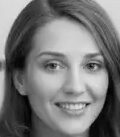

Image height= 137 px, and width= 120 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('face.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

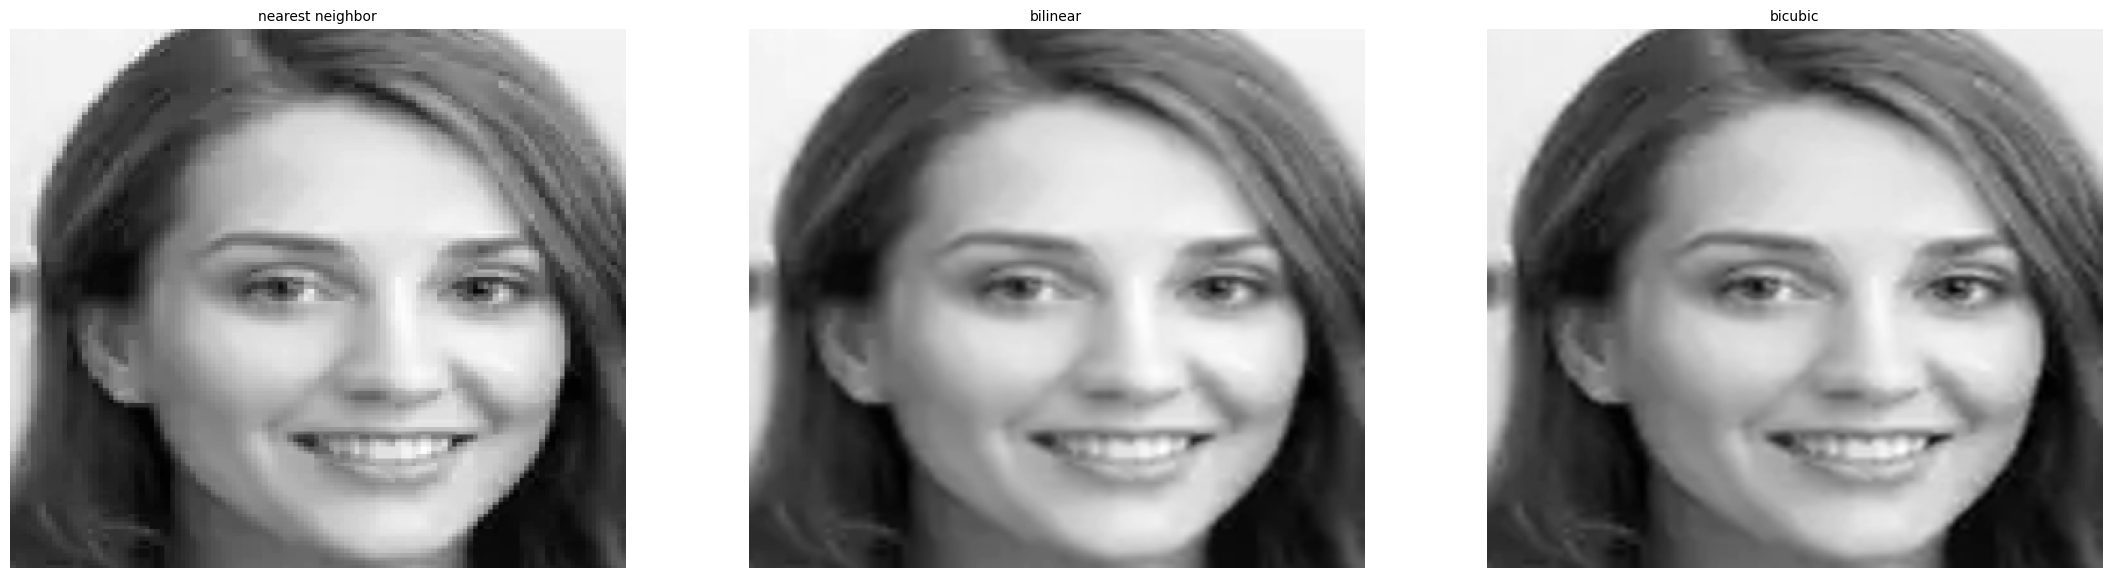

In [ ]:


ratio = 3

nearest = cv2.resize(image, (height * ratio, width * ratio), interpolation=cv2.INTER_NEAREST)
bilinear = cv2.resize(image, (height * ratio, width * ratio), interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(image, (height * ratio, width * ratio), interpolation=cv2.INTER_CUBIC)


images = [nearest, bilinear, bicubic]
descriptions = ["nearest neighbor", "bilinear", "bicubic"]

fig, axes = plt.subplots(1, 3, figsize=(27, 24))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.show()

# 2. Noise Averaging

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1mrbiRJB2ZTBmV6ykN4fi8OUynBDKZCIi -O galaxy.jpg

--2024-10-02 17:40:31--  https://drive.google.com/uc?id=1mrbiRJB2ZTBmV6ykN4fi8OUynBDKZCIi
Resolving drive.google.com (drive.google.com)... 172.253.115.101, 172.253.115.139, 172.253.115.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mrbiRJB2ZTBmV6ykN4fi8OUynBDKZCIi [following]
--2024-10-02 17:40:31--  https://drive.usercontent.google.com/download?id=1mrbiRJB2ZTBmV6ykN4fi8OUynBDKZCIi
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193291 (189K) [image/jpeg]
Saving to: ‘galaxy.jpg’

galaxy.jpg          100%[===================>] 188.76K  --.-KB/s    in 0.02s   

2024-10-02 17:40:34 (11.5 MB/s) - ‘galaxy.jpg’

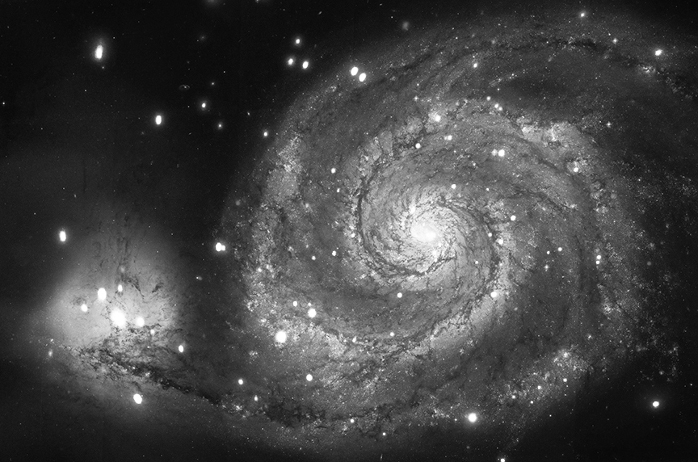

Image height= 462 px, and width= 698 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('galaxy.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

mean of image 4.0716513e-06
float32 (462, 698)


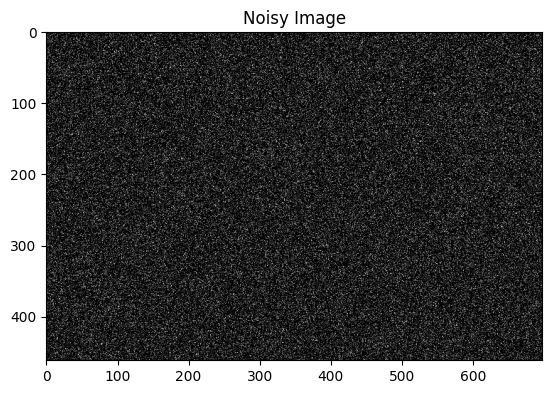

mean of noisy 4.0716513e-06


In [ ]:
# convert image to float
image = image.astype(np.float32)
image /= 255.
plt.imshow(image, cmap='gray')
print("mean of image", np.mean(image))

# apply noise to the image
mean = 0
var = 0.1
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(image.shape))
gauss = gauss.astype(np.float32)
print(gauss.dtype,gauss.shape)
#plt.imshow(gauss, cmap='gray')
noisy = gauss+image
noisy = np.maximum(np.minimum(noisy,1.0), 0.0)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()
print("mean of noisy", np.mean(image))

In [ ]:
image = cv2.imread('galaxy.jpg', cv2.IMREAD_GRAYSCALE)
height, width = image.shape
image = image.astype(np.float32)
image /= 255.

In [ ]:
Ns = [5,10, 20, 50, 100, 500, 1000]

images = [image]
descriptions = ["original image"]

for N in Ns:
  sum = np.zeros((height,width), np.float32)
  for n in range(N):
    gauss = np.random.normal(mean,sigma,(image.shape))
    gauss = gauss.astype(np.float32)
    noisy = gauss+image
    noisy = np.maximum(np.minimum(noisy,1.0), 0.0)
    sum += noisy

  meanImage = sum / N
  images.append(meanImage)
  descriptions.append(str(N))

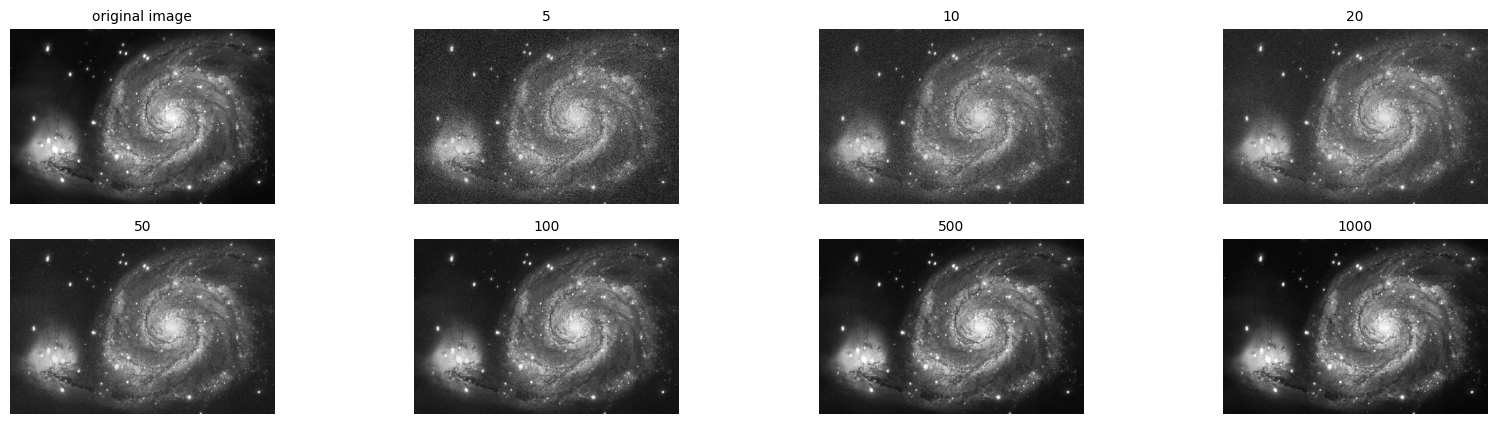

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

# 3. Image Substraction

In [ ]:
# download the sample images
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1ezvc7QuGhpYYjNse4qHe8QO2XGdtFuAn -O angiography_live_image.tif

!wget --no-check-certificate \
    https://drive.google.com/uc?id=11NKYiGuLIF6XjqOwQKNhHjuTArSl5ozz -O angiography_mask_image.tif


--2024-10-02 18:48:44--  https://drive.google.com/uc?id=1ezvc7QuGhpYYjNse4qHe8QO2XGdtFuAn
Resolving drive.google.com (drive.google.com)... 142.251.163.102, 142.251.163.139, 142.251.163.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ezvc7QuGhpYYjNse4qHe8QO2XGdtFuAn [following]
--2024-10-02 18:48:44--  https://drive.usercontent.google.com/download?id=1ezvc7QuGhpYYjNse4qHe8QO2XGdtFuAn
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176934 (173K) [application/octet-stream]
Saving to: ‘angiography_live_image.tif’

angiography_live_im 100%[===================>] 172.79K  --.-KB/s    in 0.01s   

2024-10-02 18:48

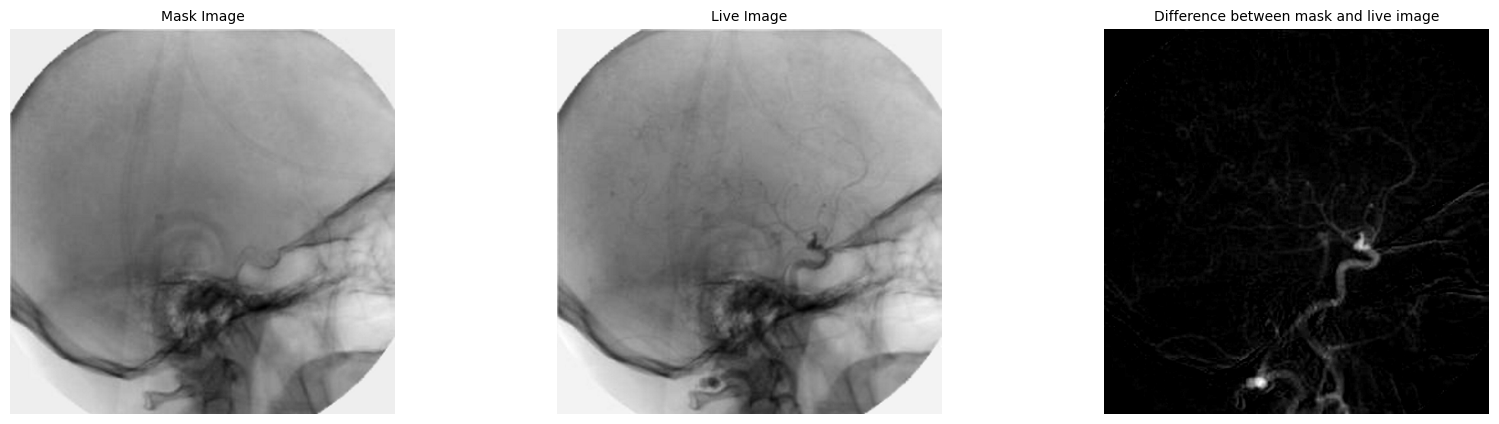

In [ ]:
liveImage = cv2.imread('angiography_live_image.tif', cv2.IMREAD_GRAYSCALE)
maskImage = cv2.imread('angiography_mask_image.tif', cv2.IMREAD_GRAYSCALE)

subtractedImage = cv2.subtract(maskImage, liveImage)
images = [maskImage, liveImage, subtractedImage]
descriptions = ["Mask Image", "Live Image", "Difference between mask and live image"]


fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

# 4. Logical Image Operations

In [ ]:
# download the sample images
!wget --no-check-certificate \
    https://drive.google.com/uc?id=16IqFP0dNh2VicauZXEBO9ljHwk1vt6wR -O national_capitol.png

!wget --no-check-certificate \
    https://drive.google.com/uc?id=1_23psoMa2LfbW2EK8xvX1RDpAPTvb414 -O AND_image_mask.png

!wget --no-check-certificate \
    https://drive.google.com/uc?id=1idgebz75sOPTkiNfjXyCp6RcPrsBWcQS -O OR_image_mask.png

--2024-10-02 20:02:04--  https://drive.google.com/uc?id=16IqFP0dNh2VicauZXEBO9ljHwk1vt6wR
Resolving drive.google.com (drive.google.com)... 142.251.163.100, 142.251.163.138, 142.251.163.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16IqFP0dNh2VicauZXEBO9ljHwk1vt6wR [following]
--2024-10-02 20:02:04--  https://drive.usercontent.google.com/download?id=16IqFP0dNh2VicauZXEBO9ljHwk1vt6wR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28810 (28K) [image/png]
Saving to: ‘national_capitol.png’

national_capitol.pn 100%[===================>]  28.13K  --.-KB/s    in 0s      

2024-10-02 20:02:06 (61.0 MB/s) - ‘na

In [ ]:
image = cv2.imread('national_capitol.png', cv2.IMREAD_GRAYSCALE)
and_mask_image = cv2.imread('AND_image_mask.png', cv2.IMREAD_GRAYSCALE)
or_mask_image = cv2.imread('OR_image_mask.png', cv2.IMREAD_GRAYSCALE)

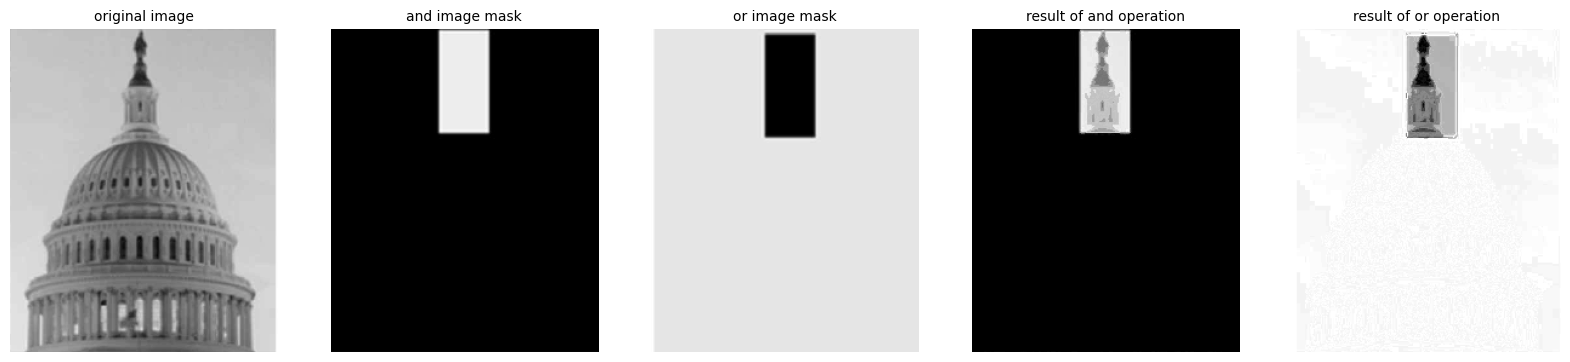

In [ ]:
bitwise_and_image = cv2.bitwise_and(image, and_mask_image)

bitwise_or_image = cv2.bitwise_or(image, cv2.add(or_mask_image, 20))

images = [image, and_mask_image, or_mask_image, bitwise_and_image, bitwise_or_image]
descriptions = ["original image", "and image mask", "or image mask", "result of and operation", "result of or operation"]


fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

# 5. Bit Plane Slicing

In [ ]:
# download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1tGK43JS3yvELwe_RsHbDpnpQyvWPL4uV -O 100-dollars.tif

--2024-10-02 20:31:33--  https://drive.google.com/uc?id=1tGK43JS3yvELwe_RsHbDpnpQyvWPL4uV
Resolving drive.google.com (drive.google.com)... 64.233.180.139, 64.233.180.100, 64.233.180.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.180.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1tGK43JS3yvELwe_RsHbDpnpQyvWPL4uV [following]
--2024-10-02 20:31:33--  https://drive.usercontent.google.com/download?id=1tGK43JS3yvELwe_RsHbDpnpQyvWPL4uV
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 596870 (583K) [application/octet-stream]
Saving to: ‘100-dollars.tif’

100-dollars.tif     100%[===================>] 582.88K  --.-KB/s    in 0.03s   

2024-10-02 20:31:36 (19.0 MB/s)

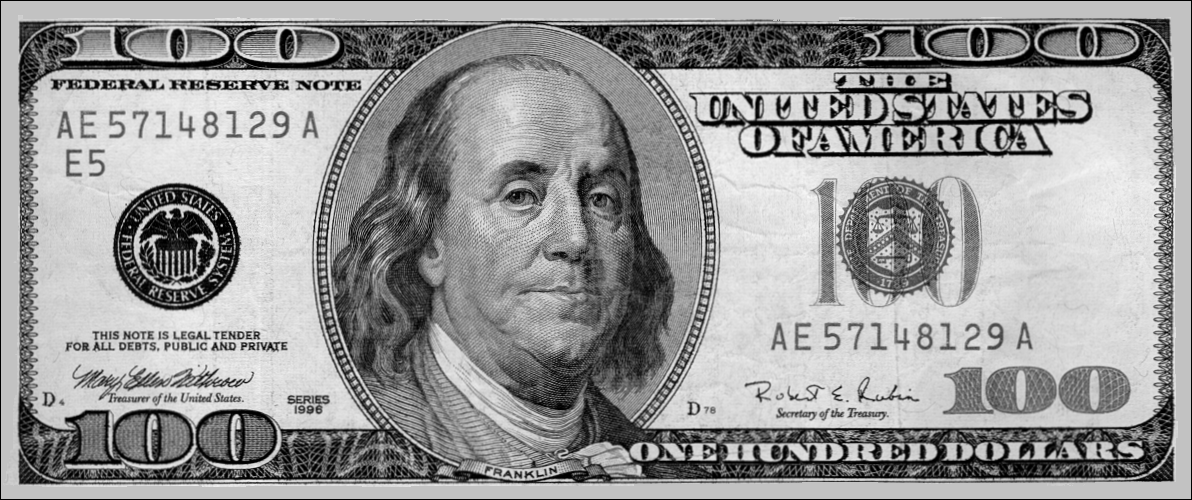

Image height= 500 px, and width= 1192 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('100-dollars.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

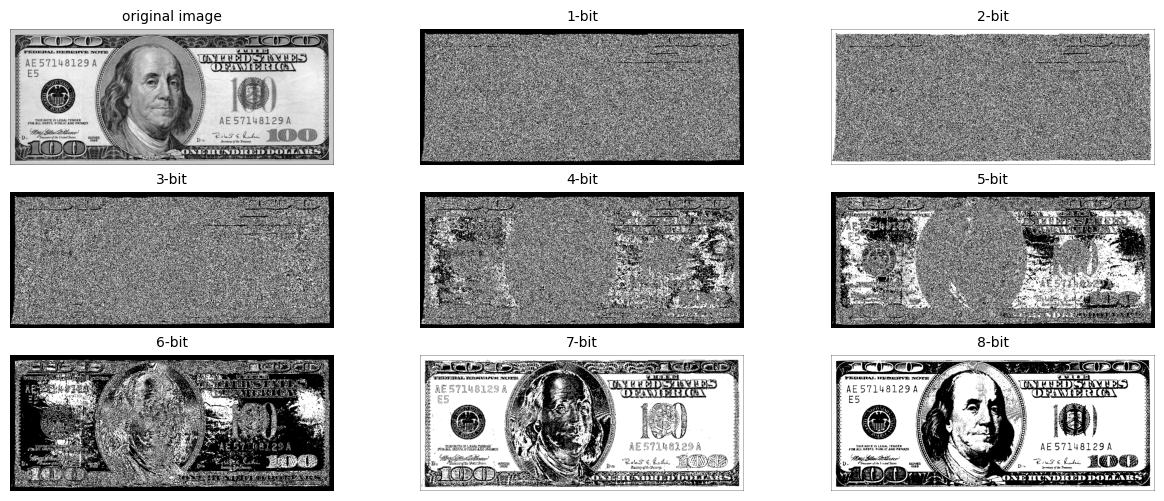

In [ ]:
images = [image]
descriptions = ["original image"]


for i in range(8):
  output = np.bitwise_and(image, 2**i)
  images.append(output)
  descriptions.append(str(i+1) + "-bit")

fig, axes = plt.subplots(3, 3, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

# 6. Histogram

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate https://drive.google.com/uc?id=1ktWCWNftzQaXN_lfmbNBA9He2A8N_jzi -O top_left.tif


--2024-10-02 21:06:07--  https://drive.google.com/uc?id=1ktWCWNftzQaXN_lfmbNBA9He2A8N_jzi
Resolving drive.google.com (drive.google.com)... 142.251.163.138, 142.251.163.101, 142.251.163.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ktWCWNftzQaXN_lfmbNBA9He2A8N_jzi [following]
--2024-10-02 21:06:07--  https://drive.usercontent.google.com/download?id=1ktWCWNftzQaXN_lfmbNBA9He2A8N_jzi
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250411 (245K) [application/octet-stream]
Saving to: ‘top_left.tif’

top_left.tif        100%[===================>] 244.54K  --.-KB/s    in 0.03s   

2024-10-02 21:06:09 (7.50 MB/s

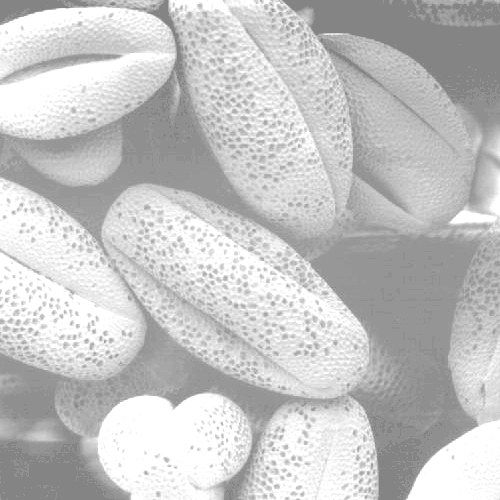

Image height= 500 px, and width= 500 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('top_left.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

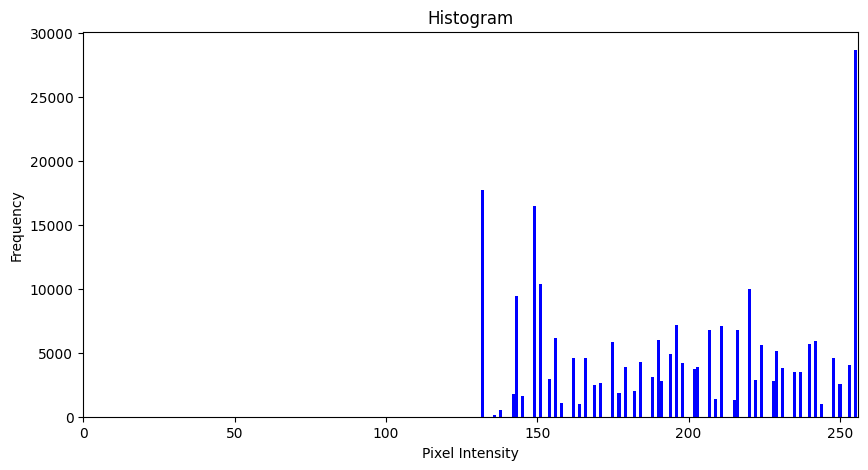

In [ ]:
histogram = np.zeros(256)

for r in range(image.shape[0]):
  for c in range(image.shape[1]):
    histogram[image[r,c]] +=1

# alternatively, you can use below function from opencv to calculate histogram
#histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Create an array of pixel values (0 to 255)
pixelValues = np.arange(256)

# Plot the histogram as a bar graph
plt.figure(figsize=(10, 5))
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.bar(pixelValues, histogram.flatten(), width=1, color='blue')  # Set width for better visibility
plt.show()

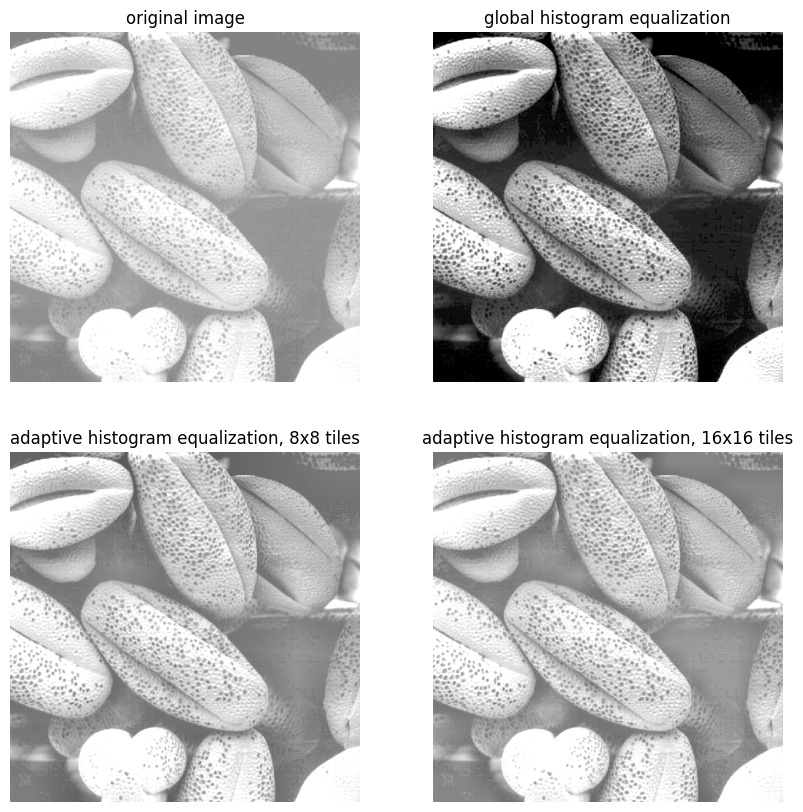

In [ ]:
# Apply Global Histogram Equalization
global_hist_eq = cv2.equalizeHist(image)

# Create a CLAHE object (Adaptive Histogram Equalization)
clahe8 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe16 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))

adaptive_hist_8 = clahe8.apply(image)
adaptive_hist_16 = clahe16.apply(image)


fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.title('original image')
plt.imshow(image, cmap='gray',vmin=0, vmax=255)

fig.add_subplot(2, 2, 2)
plt.axis('off')
plt.title('global histogram equalization')
plt.imshow(global_hist_eq, cmap='gray',vmin=0, vmax=255)

fig.add_subplot(2, 2, 3)
plt.axis('off')
plt.title('adaptive histogram equalization, 8x8 tiles')
plt.imshow(adaptive_hist_8, cmap='gray',vmin=0, vmax=255)

fig.add_subplot(2, 2, 4)
plt.axis('off')
plt.title('adaptive histogram equalization, 16x16 tiles')
plt.imshow(adaptive_hist_16, cmap='gray',vmin=0, vmax=255)

# 7. Contrast Stretching

In [ ]:
# Download the sample image
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1TnYb17hldMiYhNZ9DfpRB2SNDrfzTWzJ -O fruit_low_contrast.png

--2024-10-02 21:35:08--  https://drive.google.com/uc?id=1TnYb17hldMiYhNZ9DfpRB2SNDrfzTWzJ
Resolving drive.google.com (drive.google.com)... 142.251.163.102, 142.251.163.139, 142.251.163.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1TnYb17hldMiYhNZ9DfpRB2SNDrfzTWzJ [following]
--2024-10-02 21:35:08--  https://drive.usercontent.google.com/download?id=1TnYb17hldMiYhNZ9DfpRB2SNDrfzTWzJ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111987 (109K) [image/png]
Saving to: ‘fruit_low_contrast.png’

fruit_low_contrast. 100%[===================>] 109.36K  --.-KB/s    in 0.01s   

2024-10-02 21:35:11 (10.4 MB/s) - ‘

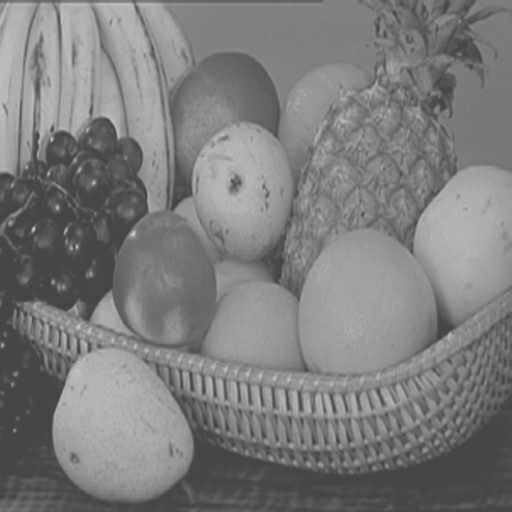

Image height= 512 px, and width= 512 px and data type: uint8


In [ ]:
# load and display the sample image
image = cv2.imread('fruit_low_contrast.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

height, width = image.shape
print("Image height=", height, "px, and width=", width, "px and data type:", image.dtype)

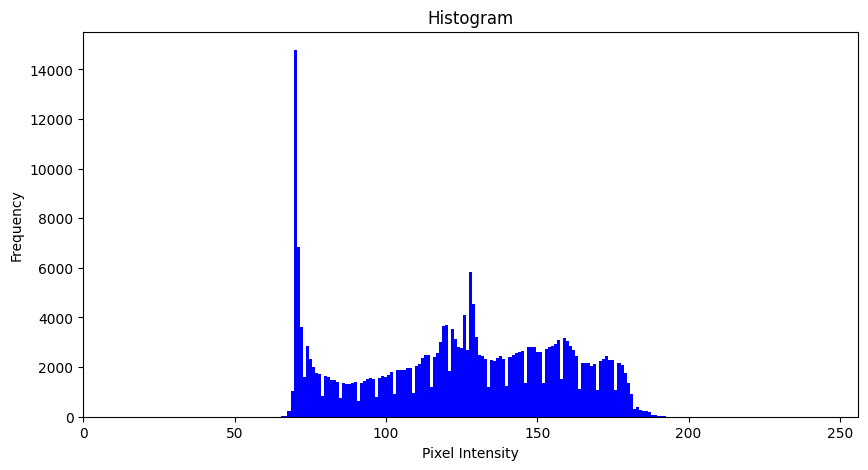

In [ ]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Create an array of pixel values (0 to 255)
pixelValues = np.arange(256)

# Plot the histogram as a bar graph
plt.figure(figsize=(10, 5))
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.bar(pixelValues, histogram.flatten(), width=1, color='blue')  # Set width for better visibility
plt.show()

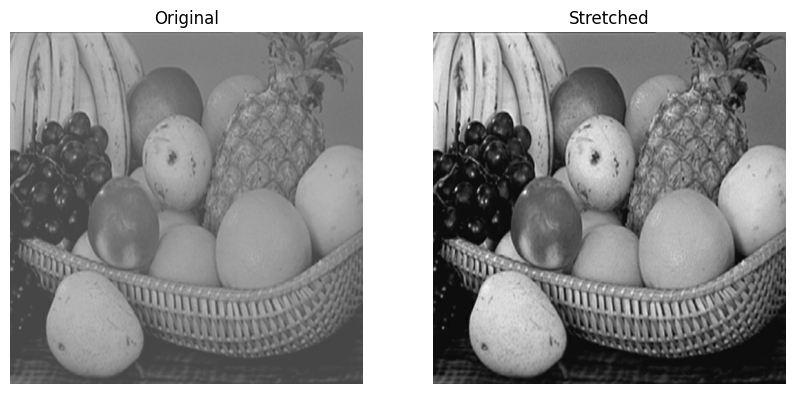

In [ ]:
# Contrast stretch

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.title('Original')
plt.imshow(image, cmap='gray',vmin=0, vmax=255)

fig.add_subplot(1, 2, 2)
imageFloat = image.astype(np.float32)
stretched = (imageFloat - np.min(imageFloat))/(np.max(imageFloat)-np.min(imageFloat)) * 255
stretched = stretched.astype(np.uint8)
plt.axis('off')
plt.title('Stretched')
plt.imshow(stretched, cmap='gray',vmin=0, vmax=255)

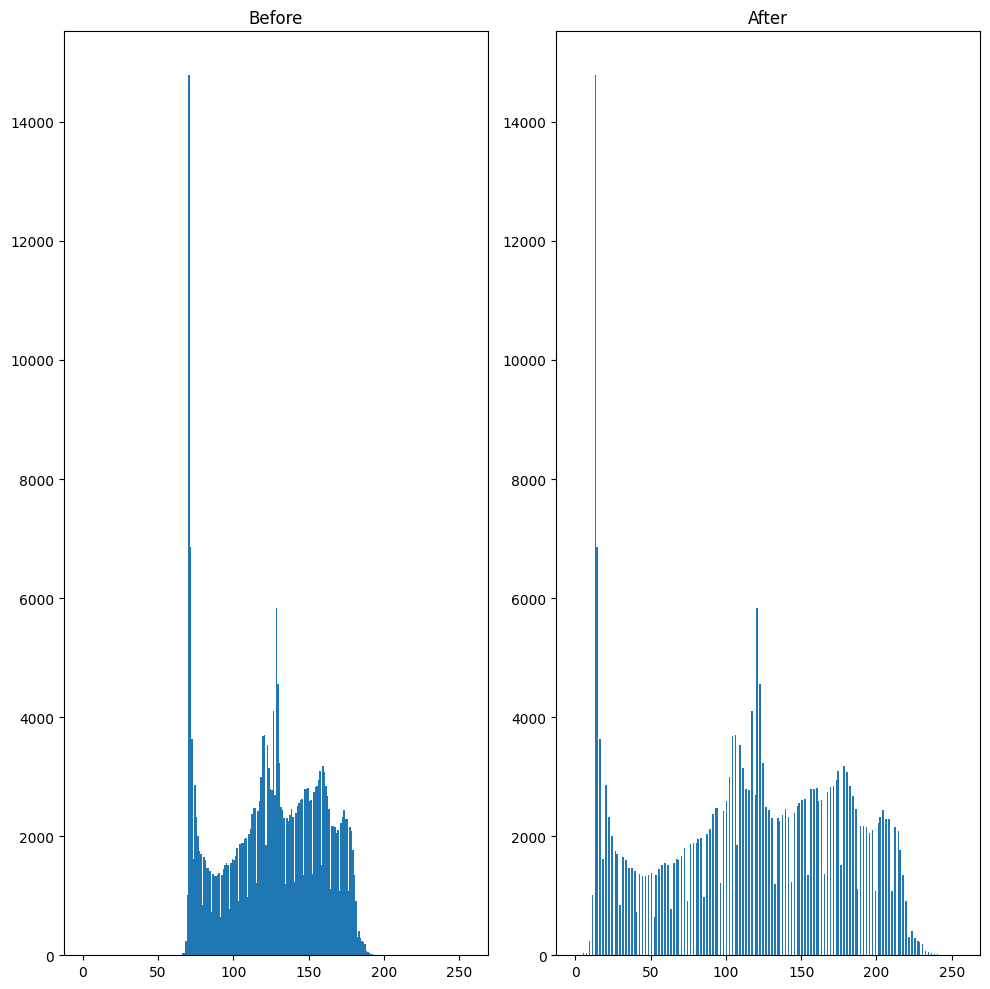

In [ ]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.title('Before')
plt.hist(image.ravel(),256,[0,256])
plt.tight_layout()

fig.add_subplot(1, 2, 2)
plt.title('After')
plt.hist(stretched.ravel(),256,[0,256])
plt.tight_layout()
plt.show()

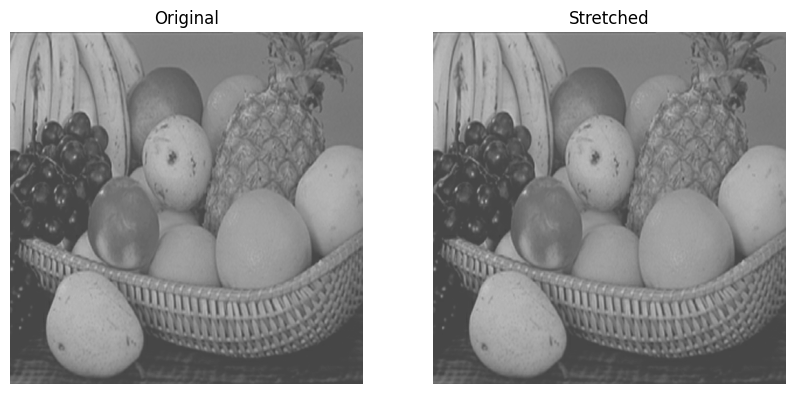

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.title('Original')
plt.imshow(image, cmap='gray',vmin=0, vmax=255)

fig.add_subplot(1, 2, 2)
imageFloat = image.astype(np.float32)

# add two exterme pixels
imageFloat[0,0] = 0.0
imageFloat[0,1] = 255.0

stretched = (imageFloat - np.min(imageFloat))/(np.max(imageFloat)-np.min(imageFloat)) * 255
stretched = stretched.astype(np.uint8)
plt.axis('off')
plt.title('Stretched')
plt.imshow(stretched, cmap='gray',vmin=0, vmax=255)

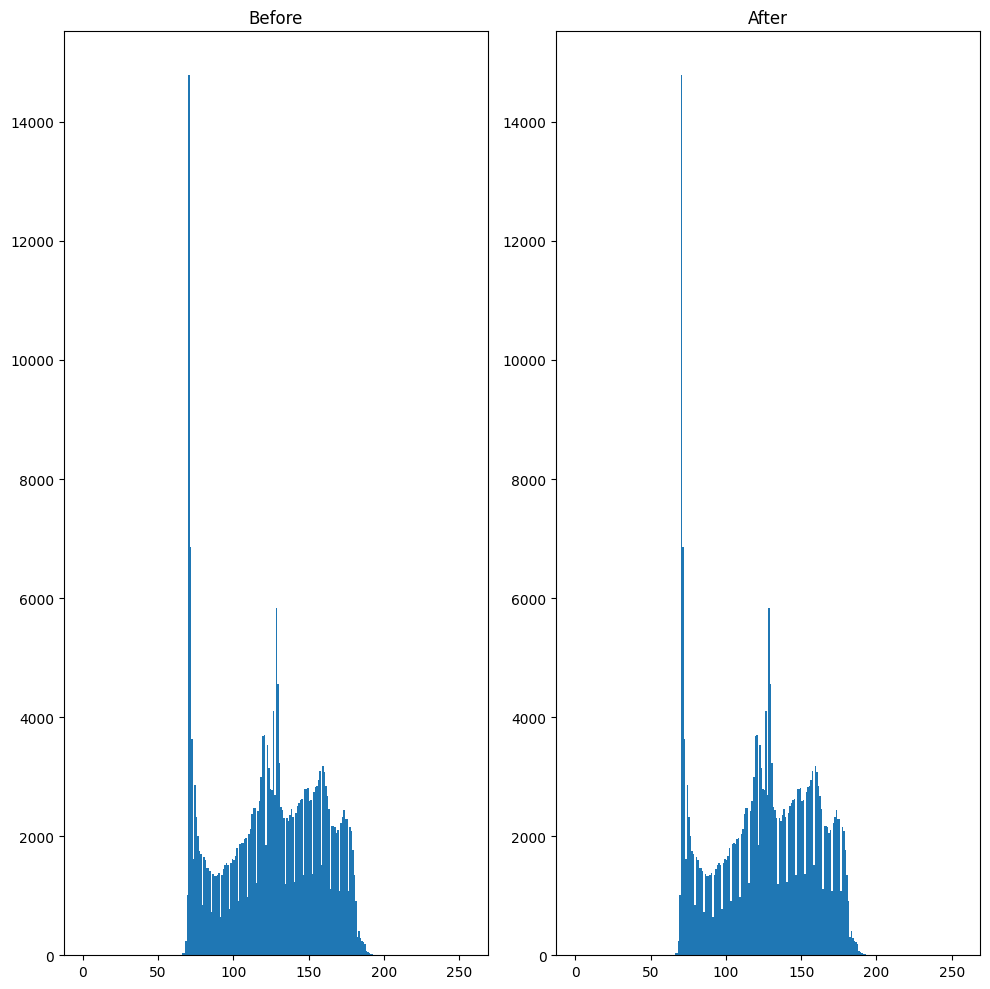

In [ ]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.title('Before')
plt.hist(image.ravel(),256,[0,256])
plt.tight_layout()

fig.add_subplot(1, 2, 2)
plt.title('After')
plt.hist(stretched.ravel(),256,[0,256])
plt.tight_layout()
plt.show()